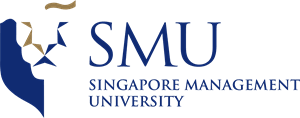
# AFI Group Project - Group 5
Group Members:
Andrew Chua Wenhua, Dong Chengyu, Gao Guanyi, Gavin Ng, Lee Chin Sze, Wu Jiayang

## 1. Import libraries

In [1]:
# Import all useful libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import random
from scipy.stats import skew, kurtosis
from datetime import datetime
import statsmodels.formula.api as smf

## 2. Obtain Stock Prices and Perform Descriptive Analysis

### 2.1 Obtain stock prices

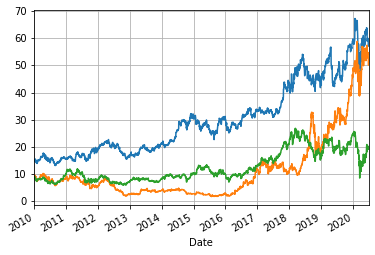

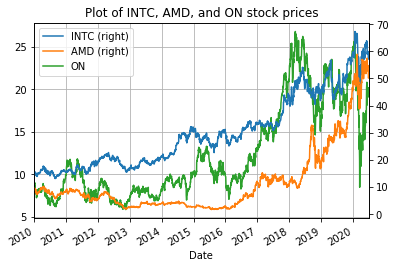

In [2]:
# Specify the starting and ending dates for the time series
start = datetime(2010, 1, 1)
end  = datetime(2020, 6, 30)

# Select stocks
selected = ['INTC','AMD','ON']

# The first argument is the series we want, second is the source (“yahoo” for  Yahoo! Finance)
intc = web.DataReader('INTC', 'yahoo', start, end)
amd = web.DataReader('AMD', 'yahoo', start, end)
on = web.DataReader('ON', 'yahoo', start, end)

# Select only the adjusted closing price data and convert the data into a DataFrame
stocks = pd.DataFrame({'INTC': intc['Adj Close'],
                       'AMD': amd['Adj Close'],
                       'ON': on['Adj Close']})

# Plot the respective graphs
intc['Adj Close'].plot(grid=True)
amd['Adj Close'].plot(grid=True)
on['Adj Close'].plot(grid=True);

# Include a secondary axis for better visualization
stocks.plot(secondary_y = ['AMD', 'INTC'], title='Plot of INTC, AMD, and ON stock prices', grid=True);

### 2.2 Descriptive statistics

In [3]:
# Present the summary statistics, rounding to 4 d.p.
stats = round(stocks.describe(), 4)
print(stats)

            INTC        AMD         ON
count  2642.0000  2642.0000  2642.0000
mean     29.9364    11.3813    12.3516
std      13.2692    12.1806     5.5082
min      13.0390     1.6200     5.8200
25%      18.6619     3.6900     8.1000
50%      27.8293     7.1100     9.9450
75%      40.6256    12.7475    16.1350
max      67.2947    58.9000    26.8000


In [4]:
# Print the skewness and kurtosis of the stocks
skewness = round(stocks.skew(), 4)
print('Skewness of the stocks:')
print(skewness)
print('\n')

kurtosis = round(stocks.kurtosis(), 4)
print('Kurtosis of the stocks: ')
print(kurtosis)

Skewness of the stocks:
INTC    0.7717
AMD     2.0116
ON      0.9191
dtype: float64


Kurtosis of the stocks: 
INTC   -0.4833
AMD     3.5340
ON     -0.4686
dtype: float64


### 2.3 Compute daily and monthly returns

In [5]:
# Compute percentage change (simple returns) and round to 4 d.p.
daily_return = stocks.pct_change()
monthly_return = stocks.resample('M').ffill().pct_change()

# Present the mean and std dev of daily returns
daily_stats = round(daily_return.aggregate([np.mean, np.std]), 4)
print(daily_stats)

        INTC     AMD      ON
mean  0.0007  0.0013  0.0007
std   0.0176  0.0364  0.0268


In [6]:
# Present the mean and std dev of monthly returns
monthly_stats = round(monthly_return.aggregate([np.mean, np.std]), 4)
print(monthly_stats)

        INTC     AMD      ON
mean  0.0131  0.0259  0.0124
std   0.0639  0.1582  0.1087


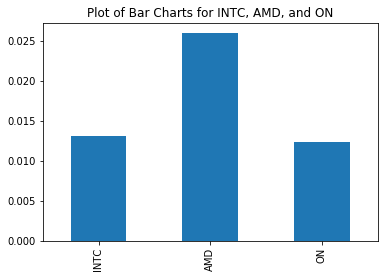

In [7]:
# Plot Bar Chart for monthly returns for all 3 stocks
monthly_return.mean().plot(kind='bar', title='Plot of Bar Charts for INTC, AMD, and ON');

### 2.4 Compute log returns

In [8]:
# Compute log return
log_return=np.log(stocks/stocks.shift(1))

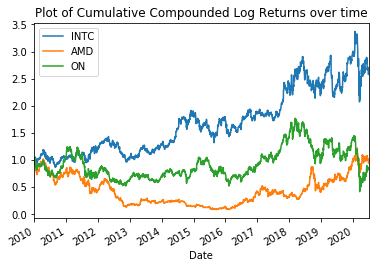

In [9]:
# Compute the cumulative log returns (cum_return) over time; use the cumprod() method to compute            
log_return = log_return.replace(np.nan, 0)
cum_comp_log_return = (1 + log_return).cumprod()

# Plot the cumulative returns of all stocks
cum_comp_log_return.plot(title = 'Plot of Cumulative Compounded Log Returns over time')
plt.show()

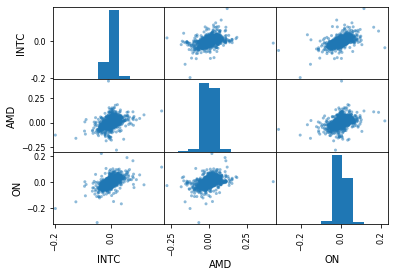

In [10]:
# Plot the histogram and scatter plot
pd.plotting.scatter_matrix(log_return, diagonal='hist');

In [11]:
# Compute and print the correlation matrix, and round up to 4 decimal places
correl=round(log_return.corr(),4)
print('The correlation matrix of the 3 stocks (log):')
print(correl)

The correlation matrix of the 3 stocks (log):
        INTC     AMD      ON
INTC  1.0000  0.4215  0.5620
AMD   0.4215  1.0000  0.4249
ON    0.5620  0.4249  1.0000


## 3. Two-asset optimization

###     3.1 Compute annual returns, std, variance-covariance matrix, and correlation

In [12]:
# Annualise daily returns and std dev 252 trading days in a year
annual_returns = daily_return.mean()*252
print('Annual Return:')
print(annual_returns)
print('\n')
      
std_dev = daily_return.aggregate(np.std)
annual_std_dev = std_dev*np.sqrt(252)
print('Annual Std Dev')
print(annual_std_dev)
print('\n')
      
# Computing variance-covariance matrix with cov() method
daily_cov_matrix = daily_return.cov()
cov_matrix = daily_cov_matrix*252

print('Variance-Covariance Matrix:')
print(cov_matrix)
print('\n')

# Compute and print Correlation matrix
corr = daily_return.corr()
print('Correlation Matrix:')
print(corr)

Annual Return:
INTC    0.172124
AMD     0.325742
ON      0.168409
dtype: float64


Annual Std Dev
INTC    0.279135
AMD     0.578062
ON      0.425527
dtype: float64


Variance-Covariance Matrix:
          INTC       AMD        ON
INTC  0.077916  0.066566  0.066235
AMD   0.066566  0.334155  0.102686
ON    0.066235  0.102686  0.181073


Correlation Matrix:
          INTC       AMD        ON
INTC  1.000000  0.412541  0.557632
AMD   0.412541  1.000000  0.417455
ON    0.557632  0.417455  1.000000


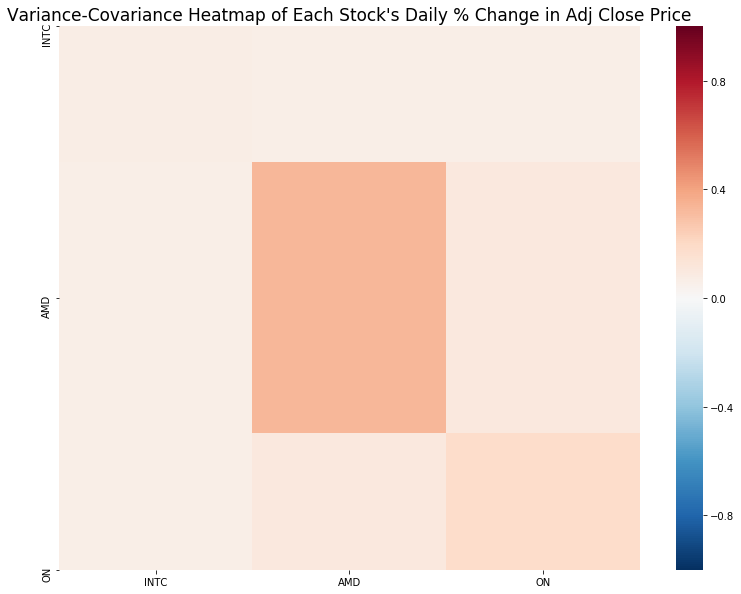

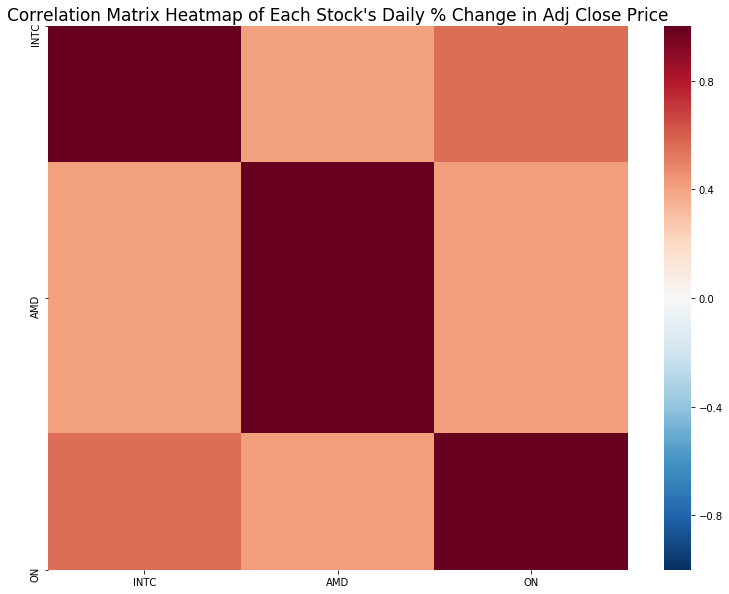

In [13]:
# Take a look at the correlation between every single stock's daily price
plt.figure(figsize=(13,10))
sns.heatmap(cov_matrix, 
        xticklabels=cov_matrix.columns,
        yticklabels=cov_matrix.columns,
        cmap="RdBu_r", vmin=-1, vmax=1)
plt.title("Variance-Covariance Heatmap of Each Stock's Daily % Change in Adj Close Price", fontsize = 17);

plt.figure(figsize=(13,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="RdBu_r", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap of Each Stock's Daily % Change in Adj Close Price", fontsize = 17);

### 3.2 Get the risk-free asset (T-bills) from Quandl

            Value
count  126.000000
mean     0.739524
std      0.804058
min      0.100000
25%      0.165000
50%      0.290000
75%      1.215000
max      2.700000 4


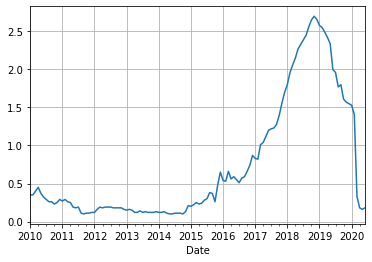

In [14]:
# Please key in your own Quandl API Key
# 1-Year Treasury Constant Maturity Rate
import quandl
QUANDL_API_KEY = 'yZJYQr7t3h9XhGeoYT3U'
quandl.ApiConfig.api_key = QUANDL_API_KEY
df_tbill=quandl.get("FRED/GS1",start_date="2010-01-01", end_date="2020-06-30")
df_tbill['Value'].plot(grid=True)
print(df_tbill.describe(),4)
S0=np.mean(df_tbill['Value'])/100

### 3.3 Find minimum variance portfolio and optimal portfolio

In [15]:
# Create empty lists to store returns, volatility and weights of imaginary portfolios
port_returns = []
port_volatility = []
port_sharpe = []
stock_weights = []

# Set the number of combinations (1,000) for imaginary portfolios
num_assets = 3 #number of assest
num_portfolios = 1000
rf = S0

for single_portfolio in range(num_portfolios):
    # Select random weights for portfolio holdings
    weights = np.random.random(num_assets)

    # Rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    sharpe = (returns-rf)/np.sqrt(variance)
    std = np.sqrt(variance)
    
    # Append the values to the respective lists
    port_returns.append(returns)
    port_volatility.append(std)
    port_sharpe.append(sharpe)
    stock_weights.append(weights)

In [16]:
# Create a nice DataFrame for Returns, Risks, Sharpe Ratio, and Weights in each stock
# A dictionary for Returns, Risk, Sharpe Ratio values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': port_sharpe}

# Extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]
#   print(counter, symbol)

# Make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in selected]
print(df)

      Returns  Volatility  Sharpe Ratio  INTC weight  AMD weight  ON weight
0    0.213341    0.328457      0.627009     0.391887    0.276330   0.331783
1    0.223036    0.353386      0.610215     0.274128    0.340736   0.385136
2    0.293297    0.488227      0.585592     0.141851    0.790432   0.067716
3    0.262729    0.414108      0.616587     0.244439    0.593723   0.161838
4    0.184706    0.304170      0.582934     0.509093    0.091563   0.399344
..        ...         ...           ...          ...         ...        ...
995  0.202409    0.341401      0.571217     0.280943    0.209469   0.509588
996  0.251907    0.382370      0.639464     0.373451    0.521892   0.104657
997  0.206991    0.345040      0.578471     0.266925    0.238921   0.494153
998  0.212694    0.334977      0.612874     0.343299    0.273368   0.383334
999  0.209987    0.314433      0.644309     0.485676    0.252802   0.261522

[1000 rows x 6 columns]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


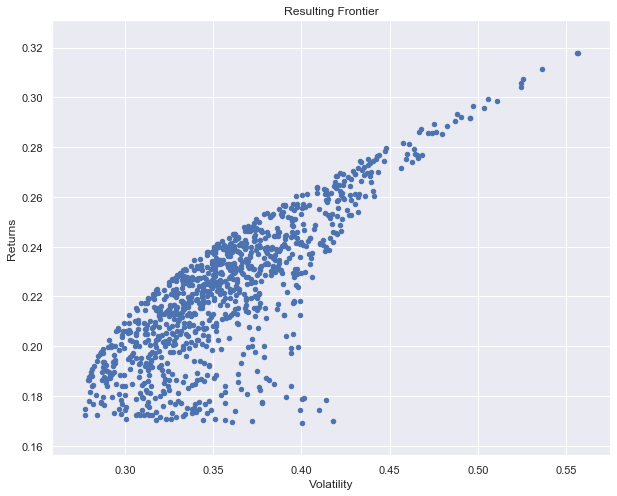

In [17]:
# Plot the resulting frontier with a scatter plot
sns.set()

df.plot.scatter(x = 'Volatility', y = 'Returns', figsize=(10, 8))
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Resulting Frontier')
plt.show();

# Plot the resulting frontier with a scatter plot
sns.set()

In [18]:
# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# Use the min, max values to locate and create the two special portfolios
min_variance_port = df.loc[df['Volatility'] == min_volatility]
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]

print('Minimum Variance Portfolio:')
print(min_variance_port)
print('\n')
print('Optimal Portfolio:')
print(sharpe_portfolio)

Minimum Variance Portfolio:
      Returns  Volatility  Sharpe Ratio  INTC weight  AMD weight  ON weight
885  0.172443    0.277205      0.595397     0.881857    0.004816   0.113327


Optimal Portfolio:
      Returns  Volatility  Sharpe Ratio  INTC weight  AMD weight  ON weight
124  0.217186    0.309013      0.678905     0.684938     0.29385   0.021212


Minimum Variance Portfolio:


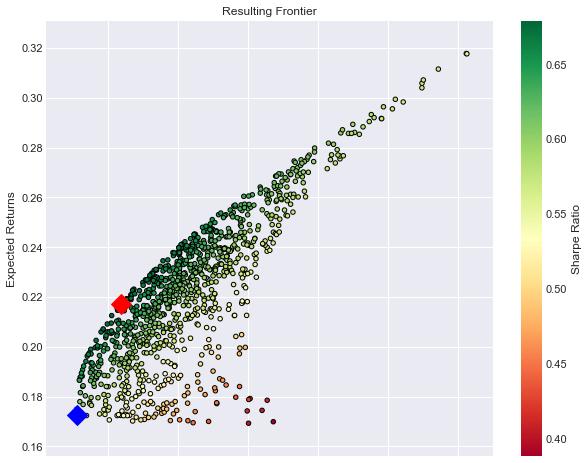

In [19]:
# Plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
                cmap = 'RdYlGn', edgecolors = 'black', figsize = (10, 8), grid = True)
plt.scatter(x = sharpe_portfolio['Volatility'], y = sharpe_portfolio['Returns'], c = 'red', marker = 'D', s = 200)
plt.scatter(x = min_variance_port['Volatility'], y = min_variance_port['Returns'], c = 'blue', marker = 'D', s = 200)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# Use the min, max values to locate and create the two special portfolios
min_variance_port = df.loc[df['Volatility'] == min_volatility]
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]

print('Minimum Variance Portfolio:')
plt.title('Resulting Frontier')
plt.show();

### 3.4 Replace ON with TXN
ON only accounts for 0.006168 in the optimal portfolio, so we want to replace it with another stock and see if there is any improvement.

In [20]:
# The first argument is the series we want, second is the source (“yahoo” for  Yahoo! Finance)
intc = web.DataReader('INTC', 'yahoo', start, end)
amd = web.DataReader('AMD', 'yahoo', start, end)
on = web.DataReader('ON', 'yahoo', start, end)
txn = web.DataReader('TXN', 'yahoo', start, end)
snp = web.DataReader('^GSPC', 'yahoo', start, end)

# Select only the adjusted closing price data and convert the data into a DataFrame
stocks = pd.DataFrame({'INTC': intc['Adj Close'],
                       'AMD': amd['Adj Close'],
                       'ON': on['Adj Close'],
                       'TXN': txn['Adj Close'],'S&P':snp['Adj Close']})

# Compute percentage change (simple returns) and round to 4 d.p.
daily_return = stocks.pct_change()

# Annualise daily returns and std dev 252 trading days in a year
annual_returns = daily_return.mean()*252
print('Annual Return:')
print(annual_returns)
print('\n')
      
std_dev = daily_return.aggregate(np.std)
annual_std_dev = std_dev*np.sqrt(252)
print('Annual Std Dev')
print(annual_std_dev)
print('\n')
      
# Computing variance-covariance matrix with cov() method
daily_cov_matrix = daily_return.cov()
cov_matrix = daily_cov_matrix*252

df1=annual_returns.to_frame(name='mean')
df2=annual_std_dev.to_frame(name='std')

df2=annual_std_dev.to_frame(name='std')
df=pd.merge(df1,df2,left_index=True, right_index=True)
df['sharpe']=(df['mean']-S0)/df['std']

print(df)

Annual Return:
INTC    0.172124
AMD     0.325742
ON      0.168409
TXN     0.212871
S&P     0.113045
dtype: float64


Annual Std Dev
INTC    0.279135
AMD     0.578062
ON      0.425527
TXN     0.268938
S&P     0.175425
dtype: float64


          mean       std    sharpe
INTC  0.172124  0.279135  0.590140
AMD   0.325742  0.578062  0.550714
ON    0.168409  0.425527  0.378388
TXN   0.212871  0.268938  0.764029
S&P   0.113045  0.175425  0.602251


In [21]:
selected = ['INTC','AMD','TXN']
stocks = pd.DataFrame({'INTC': intc['Adj Close'],
                       'AMD': amd['Adj Close'],
                       'TXN': txn['Adj Close']})

# Compute percentage change (simple returns) and round to 4 d.p.
daily_return = stocks.pct_change()

# Annualise daily returns and std dev 252 trading days in a year
annual_returns = daily_return.mean()*252
print('Annual Return:')
print(annual_returns)
print('\n')
      
std_dev = daily_return.aggregate(np.std)
annual_std_dev = std_dev*np.sqrt(252)
print('Annual Std Dev')
print(annual_std_dev)
print('\n')
      
# Computing variance-covariance matrix with cov() method
daily_cov_matrix = daily_return.cov()
cov_matrix = daily_cov_matrix*252

# Create empty lists to store returns, volatility and weights of imaginary portfolios
port_returns = []
port_volatility = []
port_sharpe = []
stock_weights = []

# Set the number of combinations (1,000) for imaginary portfolios
num_assets = 3 #number of assest
num_portfolios = 1000
rf = S0

for single_portfolio in range(num_portfolios):
    # Select random weights for portfolio holdings
    weights = np.random.random(num_assets)

    # Rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    sharpe = (returns-rf)/np.sqrt(variance)
    std = np.sqrt(variance)
    
    # Append the values to the respective lists
    port_returns.append(returns)
    port_volatility.append(std)
    port_sharpe.append(sharpe)
    stock_weights.append(weights)
    
# Create a nice DataFrame for Returns, Risks, Sharpe Ratio, and Weights in each stock
# A dictionary for Returns, Risk, Sharpe Ratio values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': port_sharpe}

# Extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]
#   print(counter, symbol)

# Make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in selected]
print(df)

Annual Return:
INTC    0.172124
AMD     0.325742
TXN     0.212871
dtype: float64


Annual Std Dev
INTC    0.279135
AMD     0.578062
TXN     0.268938
dtype: float64


      Returns  Volatility  Sharpe Ratio  INTC weight  AMD weight  TXN weight
0    0.250383    0.357773      0.679168     0.395228    0.475028    0.129744
1    0.241709    0.328110      0.714132     0.373187    0.390221    0.236592
2    0.220734    0.281138      0.758841     0.423097    0.222405    0.354498
3    0.226944    0.287941      0.762477     0.353008    0.252119    0.394874
4    0.251361    0.344735      0.707691     0.274708    0.440182    0.285110
..        ...         ...           ...          ...         ...         ...
995  0.244341    0.325253      0.728497     0.285569    0.381908    0.332523
996  0.190223    0.253939      0.719967     0.582934    0.009787    0.407279
997  0.262232    0.354098      0.719679     0.051632    0.455964    0.492404
998  0.223694    0.306278      0.706218     0.579646    0.305146

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


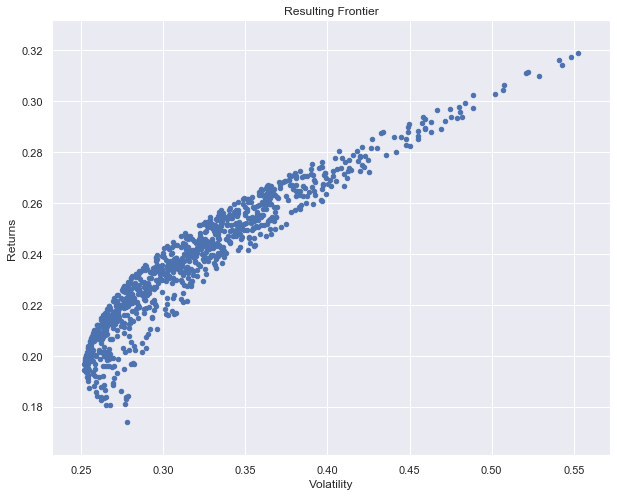

In [22]:
# Plot the resulting frontier with a scatter plot
sns.set()

df.plot.scatter(x = 'Volatility', y = 'Returns', figsize=(10, 8))
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Resulting Frontier')
plt.show();

In [23]:
# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# Use the min, max values to locate and create the two special portfolios
min_variance_port = df.loc[df['Volatility'] == min_volatility]
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]

print('Minimum Variance Portfolio:')
print(min_variance_port)
print('\n')
print('Optimal Portfolio:')
print(sharpe_portfolio)

Minimum Variance Portfolio:
      Returns  Volatility  Sharpe Ratio  INTC weight  AMD weight  TXN weight
473  0.194179    0.251824      0.741722     0.466434    0.002775    0.530791


Optimal Portfolio:
      Returns  Volatility  Sharpe Ratio  INTC weight  AMD weight  TXN weight
613  0.223949    0.271657      0.797158     0.091801    0.131283    0.776916


Minimum Variance Portfolio:


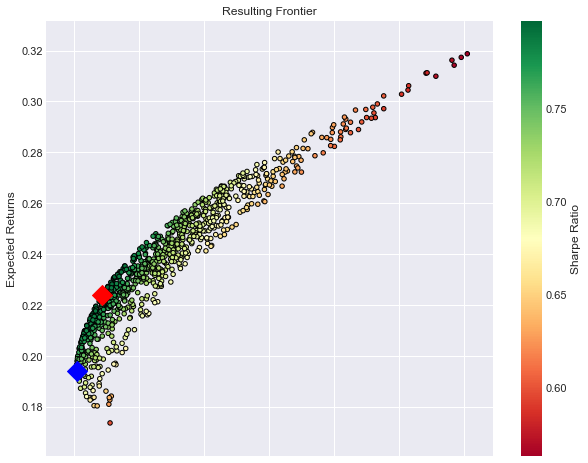

In [24]:
# Plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
                cmap = 'RdYlGn', edgecolors = 'black', figsize = (10, 8), grid = True)
plt.scatter(x = sharpe_portfolio['Volatility'], y = sharpe_portfolio['Returns'], c = 'red', marker = 'D', s = 200)
plt.scatter(x = min_variance_port['Volatility'], y = min_variance_port['Returns'], c = 'blue', marker = 'D', s = 200)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# Use the min, max values to locate and create the two special portfolios
min_variance_port = df.loc[df['Volatility'] == min_volatility]
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]

print('Minimum Variance Portfolio:')
plt.title('Resulting Frontier')
plt.show();

* **Since the weights for every stock in our portfolio is more balances, we decided to continue our analysis with TXN stock.**

### 3.5 Google Sheet API
This step intends to get investor's risk-aversion rate from our Google Survey

In [6]:
"""
from gsheets import Sheets
sheets = Sheets.from_files(r'C:/Users/dell/Desktop/A/SMU courses/ACCT655-AFI-Analytics for Financial Instruments/client_secrets.json') #C:\\Users\\Gavin Ng/client_secrets.json
#url = 'https://docs.google.com/spreadsheets/d/1aI-LFrN-P4iSlnhp1o6PJj03LoxkzdYiXevGSmeZ73I'
url = 'https://docs.google.com/spreadsheets/d/15mnppaRwiVijcjsyL2fZH_sM4tiyqL0yWkwnytGWZt8'
#https://docs.google.com/spreadsheets/d/15mnppaRwiVijcjsyL2fZH_sM4tiyqL0yWkwnytGWZt8/edit#gid=1970468202
s = sheets.get(url)
#s.find('Form Responses 1')
#s[96677403].at(row=1, col=1)  #to point to calculated cell in googlesheet.
df_response=s.sheets[0].to_frame()
df_riskaversion=s.sheets[1].to_frame()
"""

In [7]:
"""
df_riskaversion.head(15)
"""

,Name,Email Address,Q1,Q2,Q3,Q4,Risk Aversion Score
0,NaN,NaN,1,0,0,0,1
1,Gavin,nspgav@gmail.com,4,0,0,4,8
2,Ted,e@c.co,4,2,2,3,11
3,lll,test@A.com,2,2,3,2,9
4,ds,f@a.co,3,0,2,2,7
...,...,...,...,...,...,...,...
994,#REF! (Unresolved sheet name 'Form Responses 1'.),#REF! (Unresolved sheet name 'Form Responses 1'.),#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...
995,#REF! (Unresolved sheet name 'Form Responses 1'.),#REF! (Unresolved sheet name 'Form Responses 1'.),#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...
996,#REF! (Unresolved sheet name 'Form Responses 1'.),#REF! (Unresolved sheet name 'Form Responses 1'.),#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...
997,#REF! (Unresolved sheet name 'Form Responses 1'.),#REF! (Unresolved sheet name 'Form Responses 1'.),#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...,#REF! (Unresolved sheet name 'Risk Score Matri...


In [18]:
"""
s.sheets[0].to_csv('df_response.csv', encoding='utf-8', dialect='excel')
s.sheets[1].to_csv('df_riskaversion.csv', encoding='utf-8', dialect='excel')
"""

In [25]:
name = input('Enter your name: ')

Enter your name: trgfr


In [26]:
name

'trgfr'

In [27]:
from pathlib import Path
myfolder = Path('/Users/wujiayang/Desktop/ACCT655-AFI (Analytics for Financial Instruments)/Project/Codes')
df_riskaversion = pd.read_csv(myfolder / 'df_riskaversion.csv')
df_riskaversion.head(15)

,Name,Email Address,Q1,Q2,Q3,Q4,Risk Aversion Score
0,NaN,NaN,1,0,0,0,1
1,Gavin,nspgav@gmail.com,4,0,0,4,8
2,Ted,e@c.co,4,2,2,3,11
3,lll,test@A.com,2,2,3,2,9
4,ds,f@a.co,3,0,2,2,7
5,trgfr,4@w.com,2,2,3,3,10
6,aaa,f@g.com,1,0,0,0,1
7,dd,NaN,4,3,1,3,11
8,fdfd,NaN,5,2,2,2,11
9,test,NaN,5,3,3,4,15


In [28]:
A = float(df_riskaversion.loc[df_riskaversion['Name']==name]['Risk Aversion Score'])
A

10.0

### 3.6 Find final portfolio with risky asset and risk-free asset

In [29]:
# Empty lists to store weight in the risky portfolio
# as well as returns, volatility, utility value for the complete portfolios
port_returns = []
port_volatility = []
port_utility = []
riskyport_weights = []

# Set the number of combinations for portfolios, risk-aversion coefficient, risks and returns for the complete portfolios 
num_portfolios = 1000
exp_ret_p = float(sharpe_portfolio['Returns']) #0.22602853458313316 #sharpe_portfolio['Returns'].iloc[0]
std_dev_p = float(sharpe_portfolio['Volatility']) # 0.3233037450445219 #sharpe_portfolio['Volatility'].iloc[0]
rf = S0

# We start with 0% investment in risky portfolio
weight_p = 0.00 

In [30]:
# for loop to iterate through number of complete portfolios required; round each relevant value to 4 d.p.
for single_portfolio in range(num_portfolios):
    weight_p = round(weight_p, 4)
    weight_rf = round((1-weight_p), 4)
    returns = round(weight_p*exp_ret_p + weight_rf*rf, 4)
    std_dev = round(weight_p*std_dev_p, 4)
    utility = round(returns - 0.5*A*std_dev*std_dev, 4)

# We increase the weight by 0.001 and append the resulting values to the respective lists each time
    weight_p = weight_p + 0.001
    port_returns.append(returns)
    port_volatility.append(std_dev)
    port_utility.append(utility)
    riskyport_weights.append(weight_p)

In [31]:
# A dictionary for weight in risky portfolio, returns, risk, and Utility values of each complete portfolio
portfolio = {'Weight_Risky': riskyport_weights,
             'Returns': port_returns,
             'Volatility': port_volatility, 
             'Utility': port_utility}

# Make a nice dataframe 
df = pd.DataFrame(portfolio)

print(df)

     Weight_Risky  Returns  Volatility  Utility
0           0.001   0.0074      0.0000   0.0074
1           0.002   0.0076      0.0003   0.0076
2           0.003   0.0078      0.0005   0.0078
3           0.004   0.0080      0.0008   0.0080
4           0.005   0.0083      0.0011   0.0083
..            ...      ...         ...      ...
995         0.996   0.2229      0.2703  -0.1424
996         0.997   0.2231      0.2706  -0.1430
997         0.998   0.2233      0.2708  -0.1434
998         0.999   0.2235      0.2711  -0.1440
999         1.000   0.2237      0.2714  -0.1446

[1000 rows x 4 columns]


#### 3.6.1 Plot Capital Allocation Line and Utility Function

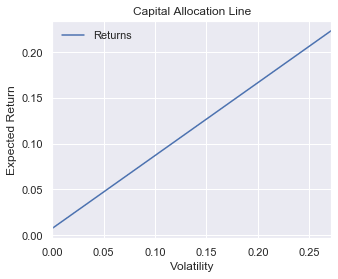

In [32]:
# Plot the Capital Allocation Line
sns.set()

df.plot.line(x = 'Volatility', y = 'Returns', figsize=(5, 4))
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Capital Allocation Line')
plt.show();

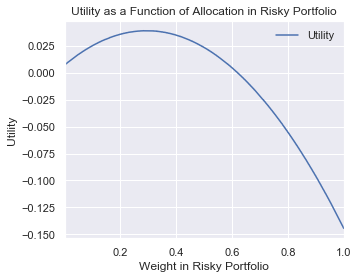

In [33]:
# Plot the Utility Function
sns.set()

df.plot.line(x='Weight_Risky', y='Utility', figsize=(5, 4))
plt.xlabel('Weight in Risky Portfolio')
plt.ylabel('Utility')
plt.title('Utility as a Function of Allocation in Risky Portfolio')
plt.show();

#### 3.6.2 Obtain Maximum Utility Value & Optimal Weights

In [34]:
# Use max() to obtain the maximum utility value and round up to 3 d.p.
util_max = round(max(port_utility), 4)

risk_premium = exp_ret_p - rf

# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky = round(risk_premium/(A*std_dev_p*std_dev_p), 3)
optimal_exp_return = round(optimal_weight_risky*exp_ret_p + (1-optimal_weight_risky)*rf, 3)
optimal_std_dev = round(optimal_weight_risky*std_dev_p, 3)
sharpe_ratio = round(risk_premium/std_dev_p, 3)

print('Maximum value of Utility =', util_max)
print('Optimal weight in risky portfolio =', optimal_weight_risky)
print('Expected return of complete portfolio =', optimal_exp_return)
print('Risk of optimal complete portfolio =', optimal_std_dev)
print('Sharpe Ratio of complete portfolio =', sharpe_ratio)

Maximum value of Utility = 0.0392
Optimal weight in risky portfolio = 0.293
Expected return of complete portfolio = 0.071
Risk of optimal complete portfolio = 0.08
Sharpe Ratio of complete portfolio = 0.797


#### 3.6.3 Plot the Indifference Curve & CAL together

In [35]:
# List of expected return and std dev for the indifference curve
exp_return_curve = []
std_dev_curve = []
num_portfolios = 11
std_dev = 0

# For loop to iterate through number of complete portfolios required
for single_portfolio in range(num_portfolios):
    exp_return = round(util_max + 0.5*A*std_dev*std_dev, 3)
    exp_return_curve.append(exp_return)
    std_dev_curve.append(std_dev)
    std_dev = round(std_dev + 0.02, 3)

# A dictionary for expected return and volatility
curve = {'Returns': exp_return_curve,
         'Volatility': std_dev_curve}

# Make a nice dataframe 
df1 = pd.DataFrame(curve)

print(df1)

    Returns  Volatility
0     0.039        0.00
1     0.041        0.02
2     0.047        0.04
3     0.057        0.06
4     0.071        0.08
5     0.089        0.10
6     0.111        0.12
7     0.137        0.14
8     0.167        0.16
9     0.201        0.18
10    0.239        0.20


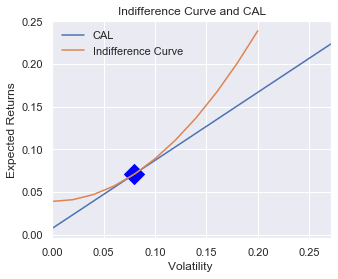

In [36]:
# Plotting the two curves togetherax = df.plot(x='Volatility', y='Returns', label='CAL', figsize = (10,8))
ax1 = df.plot(x='Volatility', y='Returns', label='CAL', figsize = (5,4))
df1.plot(ax=ax1, x='Volatility', y='Returns', label='Indifference Curve')
plt.scatter(x =optimal_std_dev, y =optimal_exp_return , c = 'blue', marker = 'D', s = 200)
plt.xlabel('Volatility ')
plt.ylabel('Expected Returns')
plt.title('Indifference Curve and CAL')
plt.legend()
plt.show()

#### 3.6.4 Plot pie chart to show the weights

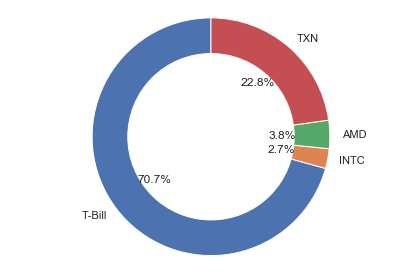

In [37]:
labels = ['T-Bill', 'INTC','AMD','TXN']
sizes = [(1-optimal_weight_risky),optimal_weight_risky*sharpe_portfolio.iloc[0].at['INTC weight'],optimal_weight_risky*sharpe_portfolio.iloc[0].at['AMD weight'],optimal_weight_risky*sharpe_portfolio.iloc[0].at['TXN weight']]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 4. Three-asset Optimization

### 4.1 Add in S&P 500 Index to portfolio

Date
2009-12-31    1115.099976
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
                 ...     
2020-06-24    3050.330078
2020-06-25    3083.760010
2020-06-26    3009.050049
2020-06-29    3053.239990
2020-06-30    3100.290039
Name: Adj Close, Length: 2642, dtype: float64
            INTC        AMD        TXN        snp
count  2642.0000  2642.0000  2642.0000  2642.0000
mean     29.9364    11.3813    56.2477  2011.0519
std      13.2692    12.1806    33.6772   618.1644
min      13.0390     1.6200    17.1718  1022.5800
25%      18.6619     3.6900    26.3996  1402.9875
50%      27.8293     7.1100    45.0110  2020.1100
75%      40.6256    12.7475    88.4969  2548.5375
max      67.2947    58.9000   131.9517  3386.1499


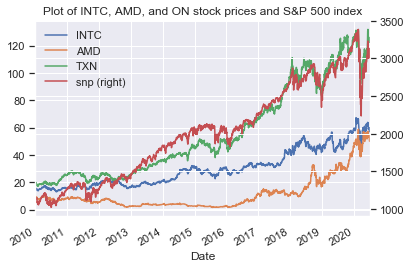

In [40]:
# Specify the starting and ending dates for the time series
start = datetime(2010, 1, 1)
#end  = datetime.today()
end  = datetime(2020, 6, 30)

# Select only the adjusted closing price data and convert the data into a DataFrame
stocks = pd.DataFrame({'INTC': intc['Adj Close'],
                       'AMD': amd['Adj Close'],
                       'TXN': txn['Adj Close'],
                       'snp':snp['Adj Close']})

# Include a secondary axis for better visualization
stocks.plot(secondary_y = ['snp'], title='Plot of INTC, AMD, and ON stock prices and S&P 500 index', grid=True);

print(snp['Adj Close'])

# Presenting the summary statistics, rounding to 4 d.p.
stats = round(stocks.describe(), 4)
print(stats)

        INTC     AMD     TXN     snp
mean  0.0007  0.0013  0.0008  0.0004
std   0.0176  0.0364  0.0169  0.0111
        INTC     AMD     TXN     snp
mean  0.0131  0.0259  0.0168  0.0089
std   0.0639  0.1582  0.0631  0.0396


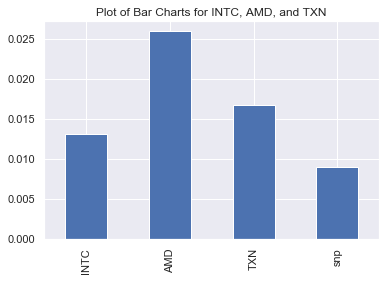

In [41]:
# Compute daily and monthly returns
# Compute percentage change (simple returns) and round to 4 d.p.
daily_return = stocks.pct_change()
monthly_return = stocks.resample('M').ffill().pct_change()

# Present the mean and std dev of daily and monthly returns
daily_stats = round(daily_return.aggregate([np.mean, np.std]), 4)
print(daily_stats)

monthly_stats = round(monthly_return.aggregate([np.mean, np.std]), 4)
print(monthly_stats)

# Plot Bar Chart for monthly returns all 4 stocks
monthly_return.mean().plot(kind='bar', title='Plot of Bar Charts for INTC, AMD, and TXN')

### 4.2 Generate betas of each stocks against S&P500

In [42]:
# Obtain stock prices of the 3 low-ESG stocks

# Specify the starting and ending dates for the time series
start = datetime(2010, 1, 1)
end  = datetime(2020, 6, 30)

# The first argument is the series we want, second is the source (“yahoo” for  Yahoo! Finance)
AVGO = web.DataReader('AVGO', 'yahoo', start, end)
QCOM = web.DataReader('QCOM', 'yahoo', start, end)
XLNX = web.DataReader('XLNX', 'yahoo', start, end)

# Select only the adjusted closing price data and convert the data into a DataFrame
beta = pd.DataFrame({'INTC': intc['Adj Close'],
                       'AMD': amd['Adj Close'],
                       'ON': on['Adj Close'],
                       'snp':snp['Adj Close'],
                       'AVGO':AVGO['Adj Close'],
                       'QCOM':QCOM['Adj Close'],
                       'XLNX':XLNX['Adj Close']})

In [43]:
# Compute monthly stock returns from price data
beta['intcret'] = beta['INTC'].pct_change()
beta['amdret'] = beta['AMD'].pct_change()
beta['onret'] = beta['ON'].pct_change()
beta['snpret'] = beta['snp'].pct_change()
beta['avgoret'] = beta['AVGO'].pct_change()
beta['qcomret'] = beta['QCOM'].pct_change()
beta['xlnxret'] = beta['XLNX'].pct_change()

# Keep relevant variables and merge data; drop data with missing values
beta = beta[['intcret','amdret','onret','snpret','avgoret','qcomret','xlnxret']]
beta2 = beta.dropna()

# Run regressions against S&P500
beta_intc = smf.ols(formula='intcret ~ snpret', data=beta2).fit()
beta_amd = smf.ols(formula='amdret ~ snpret', data=beta2).fit()
beta_txn = smf.ols(formula='onret ~ snpret', data=beta2).fit()
beta_avgo = smf.ols(formula='avgoret ~ snpret', data=beta2).fit()
beta_qcom = smf.ols(formula='qcomret ~ snpret', data=beta2).fit()
beta_xlnx = smf.ols(formula='xlnxret ~ snpret', data=beta2).fit()

# Print the summary
print(beta_intc.summary())
print(beta_amd.summary())
print(beta_txn.summary())
print(beta_avgo.summary())
print(beta_qcom.summary())
print(beta_xlnx.summary())

                            OLS Regression Results                            
Dep. Variable:                intcret   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     2538.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:29:01   Log-Likelihood:                 7814.6
No. Observations:                2641   AIC:                        -1.563e+04
Df Residuals:                    2639   BIC:                        -1.561e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      0.749      0.4

### 4.3 Compute annual returns, std dev, variance-covariance matrix, and correlation

In [44]:
# Simple daily returns with pct_change() method
daily_simple_returns = stocks.pct_change()

# Annualise daily returns and std dev 252 trading days in a year
annual_returns = daily_simple_returns.mean()*252
print('Annual Return:')
print(annual_returns)
print('\n')
      
# Daily and annual std dev
std_dev = daily_simple_returns.aggregate(np.std)
annual_std_dev = std_dev*np.sqrt(252)
print('Annual Std Dev')
print(annual_std_dev)
print('\n')
      
# Computing variance-covariance matrix with cov() method
daily_cov_matrix = daily_simple_returns.cov()
cov_matrix = daily_cov_matrix*252

print('Variance-Covariance Matrix:')
print(cov_matrix)
print('\n')

# Compute and print Correlation matrix
corr = daily_simple_returns.corr()
print('Correlation Matrix:')
print(corr)

Annual Return:
INTC    0.172124
AMD     0.325742
TXN     0.212871
snp     0.113045
dtype: float64


Annual Std Dev
INTC    0.279135
AMD     0.578062
TXN     0.268938
snp     0.175425
dtype: float64


Variance-Covariance Matrix:
          INTC       AMD       TXN       snp
INTC  0.077916  0.066566  0.051900  0.034286
AMD   0.066566  0.334155  0.072146  0.047543
TXN   0.051900  0.072146  0.072327  0.035107
snp   0.034286  0.047543  0.035107  0.030774


Correlation Matrix:
          INTC       AMD       TXN       snp
INTC  1.000000  0.412541  0.691361  0.700182
AMD   0.412541  1.000000  0.464072  0.468837
TXN   0.691361  0.464072  1.000000  0.744135
snp   0.700182  0.468837  0.744135  1.000000


Text(0.5, 1, "Correlation Matrix Heatmap of Each Stock's Daily % Change in Adj Close Price")

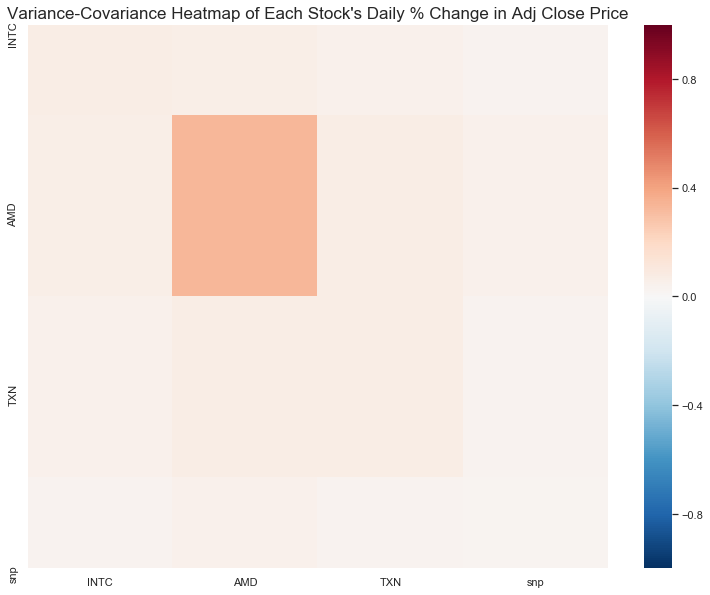

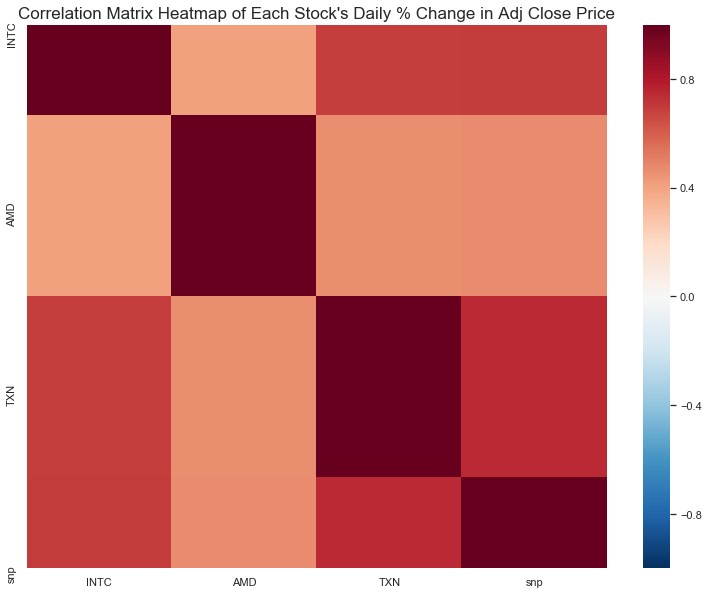

In [45]:
# Taking a look at the correlation between every single stock's daily price
plt.figure(figsize=(13,10))
sns.heatmap(cov_matrix, 
        xticklabels=cov_matrix.columns,
        yticklabels=cov_matrix.columns,
        cmap="RdBu_r", vmin=-1, vmax=1)
plt.title("Variance-Covariance Heatmap of Each Stock's Daily % Change in Adj Close Price", fontsize = 17)

plt.figure(figsize=(13,10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="RdBu_r", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap of Each Stock's Daily % Change in Adj Close Price", fontsize = 17)

### 4.4 Find the optimal risky portfolio after adding in S&P500

In [70]:
# Create empty lists to store returns, volatility and weights of imaginary portfolios
port_returns = []
port_volatility = []
port_sharpe = []
stock_weights = []

# set the number of combinations (1,000) for imaginary portfolios
num_assets = 4
num_portfolios = 1000
rf = S0

for single_portfolio in range(num_portfolios):
    # Select random weights for portfolio holdings
    weights = np.random.random(num_assets)

    # Rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_returns)
    variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    sharpe = (returns-rf)/np.sqrt(variance)
    std = np.sqrt(variance)
    
    # Appending the values to the respective lists
    port_returns.append(returns)
    port_volatility.append(std)
    port_sharpe.append(sharpe)
    stock_weights.append(weights)
    

In [71]:
# Create a nice DataFrame for Returns, Risks, Sharpe Ratio, and weights in each stock

# A dictionary for Returns, Risk, Sharpe Ratio values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': port_sharpe}

# Extend original dictionary to accomodate each ticker and weight in the portfolio
selected = ['INTC','AMD','TXN','S&P 500']

for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]
#print(counter, symbol)

# Make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# Get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' weight' for stock in selected]
print(df)

      Returns  Volatility  Sharpe Ratio  INTC weight  AMD weight  TXN weight  \
0    0.203068    0.250300      0.781751     0.233083    0.152386    0.439166   
1    0.198432    0.246558      0.774812     0.158807    0.178207    0.381668   
2    0.234676    0.316240      0.718697     0.356805    0.365627    0.228236   
3    0.225074    0.281338      0.773726     0.260614    0.238176    0.460526   
4    0.195784    0.261014      0.721757     0.464123    0.209570    0.107627   
..        ...         ...           ...          ...         ...         ...   
995  0.204635    0.265175      0.743811     0.439064    0.202134    0.226969   
996  0.184336    0.240537      0.735609     0.272203    0.193237    0.141334   
997  0.211591    0.274448      0.744022     0.038722    0.290650    0.344979   
998  0.154274    0.202982      0.723607     0.039548    0.110101    0.155016   
999  0.210545    0.268069      0.757828     0.229713    0.244801    0.319161   

     S&P 500 weight  
0          0.1753

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


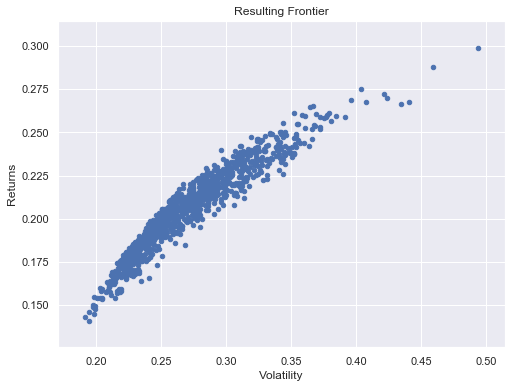

In [72]:
# Plot the resulting frontier with a scatter plot
sns.set()

df.plot.scatter(x = 'Volatility', y = 'Returns', figsize=(8, 6))
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Resulting Frontier')
plt.show();

In [73]:
# Find minimum variance portfolio & optimal portfolio with max Sharpe ratio in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# Use the min, max values to locate and create the two special portfolios
min_variance_port = df.loc[df['Volatility'] == min_volatility]
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]

print('Minimum Variance Portfolio:')
print(min_variance_port)
print('\n')
print('Optimal Portfolio:')
print(sharpe_portfolio)

Minimum Variance Portfolio:
      Returns  Volatility  Sharpe Ratio  INTC weight  AMD weight  TXN weight  \
118  0.143208    0.191805      0.708079     0.041022    0.061141    0.147607   

     S&P 500 weight  
118         0.75023  


Optimal Portfolio:
      Returns  Volatility  Sharpe Ratio  INTC weight  AMD weight  TXN weight  \
773  0.219891    0.266939      0.796047     0.063681     0.15284     0.70698   

     S&P 500 weight  
773        0.076499  


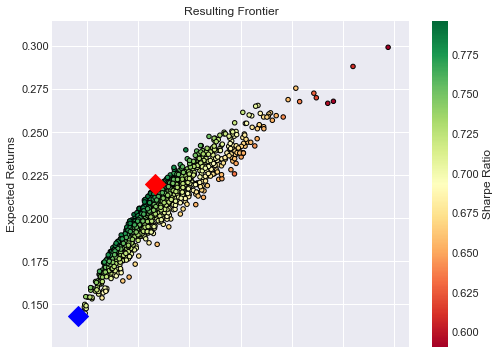

In [74]:
# Plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x = 'Volatility', y = 'Returns', c = 'Sharpe Ratio',
                cmap = 'RdYlGn', edgecolors = 'black', figsize = (8, 6), grid = True)
plt.scatter(x = sharpe_portfolio['Volatility'], y = sharpe_portfolio['Returns'], c = 'red', marker = 'D', s = 200)
plt.scatter(x = min_variance_port['Volatility'], y = min_variance_port['Returns'], c = 'blue', marker = 'D', s = 200)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Resulting Frontier')
plt.show();

### 4.5 Find final portfolio with risky asset and risk-free asset after adding in S&P500

In [75]:
# Empty lists to store weight in the risky portfolio
# as well as returns, volatility, utility value for the complete portfolios
port_returns = []
port_volatility = []
port_utility = []
riskyport_weights = []

# Set the number of combinations for portfolios, risk-aversion coefficient, risks and returns for the complete portfolios 
num_portfolios = 1000
exp_ret_p = float(sharpe_portfolio['Returns']) #0.22602853458313316 #sharpe_portfolio['Returns'].iloc[0]
std_dev_p = float(sharpe_portfolio['Volatility']) # 0.3233037450445219 #sharpe_portfolio['Volatility'].iloc[0]
rf = S0

# We start with 0% investment in risky portfolio
weight_p = 0.00 

In [76]:
# for loop to iterate through number of complete portfolios required; round each relevant value to 4 d.p.
for single_portfolio in range(num_portfolios):
    weight_p = round(weight_p, 4)
    weight_rf = round((1-weight_p), 4)
    returns = round(weight_p*exp_ret_p + weight_rf*rf, 4)
    std_dev = round(weight_p*std_dev_p, 4)
    utility = round(returns - 0.5*A*std_dev*std_dev, 4)

# We increase the weight by 0.001 and append the resulting values to the respective lists each time
    weight_p = weight_p + 0.001
    port_returns.append(returns)
    port_volatility.append(std_dev)
    port_utility.append(utility)
    riskyport_weights.append(weight_p)

In [77]:
# A dictionary for weight in risky portfolio, returns, risk, and Utility values of each complete portfolio
portfolio_10 = {'Weight_Risky': riskyport_weights,
             'Returns': port_returns,
             'Volatility': port_volatility, 
             'Utility': port_utility}

# Make a nice dataframe 
df_10 = pd.DataFrame(portfolio_10)

print(df_10)

     Weight_Risky  Returns  Volatility  Utility
0           0.001   0.0074      0.0000   0.0074
1           0.002   0.0076      0.0003   0.0076
2           0.003   0.0078      0.0005   0.0078
3           0.004   0.0080      0.0008   0.0080
4           0.005   0.0082      0.0011   0.0082
..            ...      ...         ...      ...
995         0.996   0.2188      0.2656  -0.1339
996         0.997   0.2190      0.2659  -0.1345
997         0.998   0.2193      0.2661  -0.1347
998         0.999   0.2195      0.2664  -0.1353
999         1.000   0.2197      0.2667  -0.1359

[1000 rows x 4 columns]


#### 4.5.1 Plot Capital Allocation Line and Utility Function

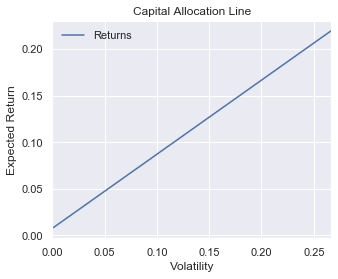

In [78]:
# Plot Capital Allocation Line
sns.set()

df_10.plot.line(x = 'Volatility', y = 'Returns', figsize=(5, 4))
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Capital Allocation Line')
plt.show();

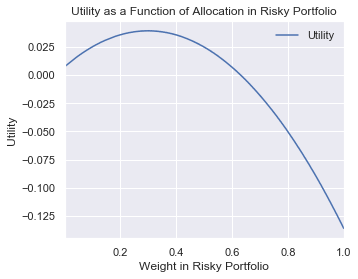

In [79]:
# Plot the Utility Function
sns.set()

df_10.plot.line(x='Weight_Risky', y='Utility', figsize=(5, 4))
plt.xlabel('Weight in Risky Portfolio')
plt.ylabel('Utility')
plt.title('Utility as a Function of Allocation in Risky Portfolio')
plt.show();

#### 4.5.2 Obtain Maximum Utility Value & Optimal Weights

In [80]:
# Use max() to obtain the maximum utility value and round up to 3 d.p.
util_max = round(max(port_utility), 4)

risk_premium = exp_ret_p - rf

# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky = round(risk_premium/(A*std_dev_p*std_dev_p), 3)
optimal_exp_return = round(optimal_weight_risky*exp_ret_p + (1-optimal_weight_risky)*rf, 3)
optimal_std_dev = round(optimal_weight_risky*std_dev_p, 3)
sharpe_ratio = round(risk_premium/std_dev_p, 3)

print('Maximum value of Utility =', util_max)
print('Optimal weight in risky portfolio =', optimal_weight_risky)
print('Expected return of complete portfolio =', optimal_exp_return)
print('Risk of optimal complete portfolio =', optimal_std_dev)
print('Sharpe Ratio of complete portfolio =', sharpe_ratio)

Maximum value of Utility = 0.0392
Optimal weight in risky portfolio = 0.298
Expected return of complete portfolio = 0.071
Risk of optimal complete portfolio = 0.08
Sharpe Ratio of complete portfolio = 0.796


#### 4.5.3 Plot the Indifference Curve & CAL together

In [81]:
# List of expected return and std dev for the indifference curve
exp_return_curve = []
std_dev_curve = []
num_portfolios = 11
std_dev = 0

# For loop to iterate through number of complete portfolios required
for single_portfolio in range(num_portfolios):
    exp_return = round(util_max + 0.5*A*std_dev*std_dev, 3)
    exp_return_curve.append(exp_return)
    std_dev_curve.append(std_dev)
    std_dev = round(std_dev + 0.02, 3)

# A dictionary for expected return and volatility
curve = {'Returns': exp_return_curve,
         'Volatility': std_dev_curve}

# Make a nice dataframe 
df1 = pd.DataFrame(curve)

print(df1)

    Returns  Volatility
0     0.039        0.00
1     0.041        0.02
2     0.047        0.04
3     0.057        0.06
4     0.071        0.08
5     0.089        0.10
6     0.111        0.12
7     0.137        0.14
8     0.167        0.16
9     0.201        0.18
10    0.239        0.20


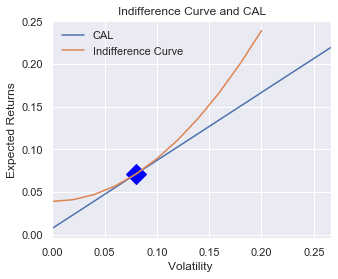

In [82]:
# Plot the Indifference Curve & CAL together
# Plot the two curves togetherax = df.plot(x='Volatility', y='Returns', label='CAL', figsize = (10,8))
ax1 = df_10.plot(x='Volatility', y='Returns', label='CAL', figsize = (5,4))
df1.plot(ax=ax1, x='Volatility', y='Returns', label='Indifference Curve')
plt.scatter(x =optimal_std_dev, y =optimal_exp_return , c = 'blue', marker = 'D', s = 200)
plt.xlabel('Volatility ')
plt.ylabel('Expected Returns')
plt.title('Indifference Curve and CAL')
plt.legend()
plt.show()


#### 4.5.4 Plot pie chart to show the weights

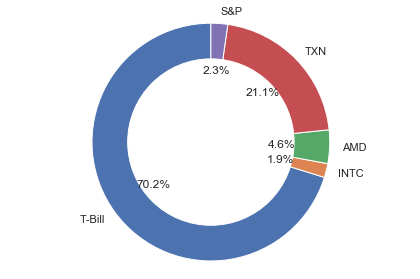

In [83]:
# Plot pie chart to show the weights
labels = ['T-Bill', 'INTC','AMD','TXN','S&P']
sizes = [(1-optimal_weight_risky),optimal_weight_risky*sharpe_portfolio.iloc[0].at['INTC weight'],optimal_weight_risky*sharpe_portfolio.iloc[0].at['AMD weight'],optimal_weight_risky*sharpe_portfolio.iloc[0].at['TXN weight'],optimal_weight_risky*sharpe_portfolio.iloc[0].at['S&P 500 weight']]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 5. Compare asset weights among people with different risk-aversion rates

### 5.1 First investor with a risk-aversion rate of 10

In [84]:
# The first person has a risk-aversion rate of 10, which is the example we've use above
# Calculate the weights of each asset
INTCw1 = float(sharpe_portfolio['INTC weight'])*optimal_weight_risky
AMDw1 = float(sharpe_portfolio['AMD weight'])*optimal_weight_risky
TXNw1 = float(sharpe_portfolio['TXN weight'])*optimal_weight_risky
SPw1 = float(sharpe_portfolio['S&P 500 weight'])*optimal_weight_risky
Tbillsw1 = 1 -optimal_weight_risky
maxutility1 = util_max
optimalreturn1 = optimal_exp_return

### 5.2 Second investor with a risk-aversion rate of 7

In [85]:
# The second person has a risk-aversion rate of 7
name = input('Enter your name: ')
A2 = float(df_riskaversion.loc[df_riskaversion['Name']==name]['Risk Aversion Score'])### 5.1 First investor with a risk-aversion rate of 10

Enter your name: ds


In [86]:
# Empty lists to store weight in the risky portfolio
# as well as returns, volatility, utility value for the complete portfolios
port_returns = []
port_volatility = []
port_utility = []
riskyport_weights = []

# Set the number of combinations for portfolios, risk-aversion coefficient, risks and returns for the complete portfolios 
num_portfolios = 1000
exp_ret_p = float(sharpe_portfolio['Returns']) #0.22602853458313316 #sharpe_portfolio['Returns'].iloc[0]
std_dev_p = float(sharpe_portfolio['Volatility']) # 0.3233037450445219 #sharpe_portfolio['Volatility'].iloc[0]
rf = S0

# We start with 0% investment in risky portfolio
weight_p = 0.00 

In [87]:
# for loop to iterate through number of complete portfolios required; round each relevant value to 4 d.p.
for single_portfolio in range(num_portfolios):
    weight_p = round(weight_p, 4)
    weight_rf = round((1-weight_p), 4)
    returns = round(weight_p*exp_ret_p + weight_rf*rf, 4)
    std_dev = round(weight_p*std_dev_p, 4)
    utility = round(returns - 0.5*A2*std_dev*std_dev, 4)

# We increase the weight by 0.001 and append the resulting values to the respective lists each time
    weight_p = weight_p + 0.001
    port_returns.append(returns)
    port_volatility.append(std_dev)
    port_utility.append(utility)
    riskyport_weights.append(weight_p)

In [88]:
# A dictionary for weight in risky portfolio, returns, risk, and Utility values of each complete portfolio
portfolio_7 = {'Weight_Risky': riskyport_weights,
             'Returns': port_returns,
             'Volatility': port_volatility, 
             'Utility': port_utility}

# Make a nice dataframe 
df_7 = pd.DataFrame(portfolio_7)

print(df_7)

     Weight_Risky  Returns  Volatility  Utility
0           0.001   0.0074      0.0000   0.0074
1           0.002   0.0076      0.0003   0.0076
2           0.003   0.0078      0.0005   0.0078
3           0.004   0.0080      0.0008   0.0080
4           0.005   0.0082      0.0011   0.0082
..            ...      ...         ...      ...
995         0.996   0.2188      0.2656  -0.0281
996         0.997   0.2190      0.2659  -0.0285
997         0.998   0.2193      0.2661  -0.0285
998         0.999   0.2195      0.2664  -0.0289
999         1.000   0.2197      0.2667  -0.0293

[1000 rows x 4 columns]


In [89]:
# Use max() to obtain the maximum utility value and round up to 3 d.p.
util_max = round(max(port_utility), 4)

risk_premium = exp_ret_p - rf

# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky = round(risk_premium/(A2*std_dev_p*std_dev_p), 3)
optimal_exp_return = round(optimal_weight_risky*exp_ret_p + (1-optimal_weight_risky)*rf, 3)
optimal_std_dev = round(optimal_weight_risky*std_dev_p, 3)
sharpe_ratio = round(risk_premium/std_dev_p, 3)

print('Maximum value of Utility =', util_max)
print('Optimal weight in risky portfolio =', optimal_weight_risky)
print('Expected return of complete portfolio =', optimal_exp_return)
print('Risk of optimal complete portfolio =', optimal_std_dev)
print('Sharpe Ratio of complete portfolio =', sharpe_ratio)

Maximum value of Utility = 0.0527
Optimal weight in risky portfolio = 0.426
Expected return of complete portfolio = 0.098
Risk of optimal complete portfolio = 0.114
Sharpe Ratio of complete portfolio = 0.796


In [90]:
# Calculate the weights of each asset
INTCw2 = float(sharpe_portfolio['INTC weight'])*optimal_weight_risky
AMDw2 = float(sharpe_portfolio['AMD weight'])*optimal_weight_risky
TXNw2 = float(sharpe_portfolio['TXN weight'])*optimal_weight_risky
SPw2 = float(sharpe_portfolio['S&P 500 weight'])*optimal_weight_risky
Tbillsw2 = 1 - optimal_weight_risky
maxutility2 = util_max
optimalreturn2 = optimal_exp_return

### 5.3 Third investor with a risk-aversion rate of 3

In [91]:
# The third person has a risk-aversion rate of 3
name = input('Enter your name: ')
A3 = float(df_riskaversion.loc[df_riskaversion['Name']==name]['Risk Aversion Score'])### 5.1 First investor with a risk-aversion rate of 10

Enter your name: JiaYang


In [92]:
# Empty lists to store weight in the risky portfolio
# as well as returns, volatility, utility value for the complete portfolios
port_returns = []
port_volatility = []
port_utility = []
riskyport_weights = []

# Set the number of combinations for portfolios, risk-aversion coefficient, risks and returns for the complete portfolios 
num_portfolios = 1000
exp_ret_p = float(sharpe_portfolio['Returns']) #0.22602853458313316 #sharpe_portfolio['Returns'].iloc[0]
std_dev_p = float(sharpe_portfolio['Volatility']) # 0.3233037450445219 #sharpe_portfolio['Volatility'].iloc[0]
rf = S0

# We start with 0% investment in risky portfolio
weight_p = 0.00 

In [93]:
# for loop to iterate through number of complete portfolios required; round each relevant value to 4 d.p.
for single_portfolio in range(num_portfolios):
    weight_p = round(weight_p, 4)
    weight_rf = round((1-weight_p), 4)
    returns = round(weight_p*exp_ret_p + weight_rf*rf, 4)
    std_dev = round(weight_p*std_dev_p, 4)
    utility = round(returns - 0.5*A3*std_dev*std_dev, 4)

# We increase the weight by 0.001 and append the resulting values to the respective lists each time
    weight_p = weight_p + 0.001
    port_returns.append(returns)
    port_volatility.append(std_dev)
    port_utility.append(utility)
    riskyport_weights.append(weight_p)

In [94]:
# A dictionary for weight in risky portfolio, returns, risk, and Utility values of each complete portfolio
portfolio_3 = {'Weight_Risky': riskyport_weights,
             'Returns': port_returns,
             'Volatility': port_volatility, 
             'Utility': port_utility}

# Make a nice dataframe 
df_3 = pd.DataFrame(portfolio_3)

print(df_3)

     Weight_Risky  Returns  Volatility  Utility
0           0.001   0.0074      0.0000   0.0074
1           0.002   0.0076      0.0003   0.0076
2           0.003   0.0078      0.0005   0.0078
3           0.004   0.0080      0.0008   0.0080
4           0.005   0.0082      0.0011   0.0082
..            ...      ...         ...      ...
995         0.996   0.2188      0.2656   0.1130
996         0.997   0.2190      0.2659   0.1129
997         0.998   0.2193      0.2661   0.1131
998         0.999   0.2195      0.2664   0.1130
999         1.000   0.2197      0.2667   0.1130

[1000 rows x 4 columns]


In [95]:
# Use max() to obtain the maximum utility value and round up to 3 d.p.
util_max = round(max(port_utility), 4)

risk_premium = exp_ret_p - rf

# Use formula to find optimal weight in the risky portfolio
optimal_weight_risky = round(risk_premium/(A3*std_dev_p*std_dev_p), 3)
optimal_exp_return = round(optimal_weight_risky*exp_ret_p + (1-optimal_weight_risky)*rf, 3)
optimal_std_dev = round(optimal_weight_risky*std_dev_p, 3)
sharpe_ratio = round(risk_premium/std_dev_p, 3)

print('Maximum value of Utility =', util_max)
print('Optimal weight in risky portfolio =', optimal_weight_risky)
print('Expected return of complete portfolio =', optimal_exp_return)
print('Risk of optimal complete portfolio =', optimal_std_dev)
print('Sharpe Ratio of complete portfolio =', sharpe_ratio)

Maximum value of Utility = 0.1131
Optimal weight in risky portfolio = 0.994
Expected return of complete portfolio = 0.219
Risk of optimal complete portfolio = 0.265
Sharpe Ratio of complete portfolio = 0.796


In [96]:
# Calculate the weights of each asset
INTCw3 = float(sharpe_portfolio['INTC weight'])*optimal_weight_risky
AMDw3 = float(sharpe_portfolio['AMD weight'])*optimal_weight_risky
TXNw3 = float(sharpe_portfolio['TXN weight'])*optimal_weight_risky
SPw3 = float(sharpe_portfolio['S&P 500 weight'])*optimal_weight_risky
Tbillsw3 = 1 - optimal_weight_risky
maxutility3 = util_max
optimalreturn3 = optimal_exp_return

### 5.3 Comparison table

In [97]:
comparison = {'Name': ['JiaYang','ds','trgfr'],
              "Risk-Aversion (A)": [A3,A2,A],
             'Weights of INTC': [INTCw3,INTCw2,INTCw1],
             'Weights of AMD': [AMDw3,AMDw2,AMDw1],
             'Weights of TXN': [TXNw3,TXNw2,TXNw1],
             'Weights of S&P500': [SPw3,SPw2,SPw1],
             'Weights of Tbills': [Tbillsw3,Tbillsw2,Tbillsw1],
             'Maximum value of Utility': [maxutility3,maxutility2,maxutility1],
             'Expected return of complete portfolio': [optimalreturn3,optimalreturn2,optimalreturn1]}
df_comparison = pd.DataFrame(comparison)
df_comparison

,Name,Risk-Aversion (A),Weights of INTC,Weights of AMD,Weights of TXN,Weights of S&P500,Weights of Tbills,Maximum value of Utility,Expected return of complete portfolio
0,JiaYang,3.0,0.063299,0.151923,0.702738,0.076040,0.006,0.1131,0.219
1,ds,7.0,0.027128,0.065110,0.301173,0.032588,0.574,0.0527,0.098
2,trgfr,10.0,0.018977,0.045546,0.210680,0.022797,0.702,0.0392,0.071


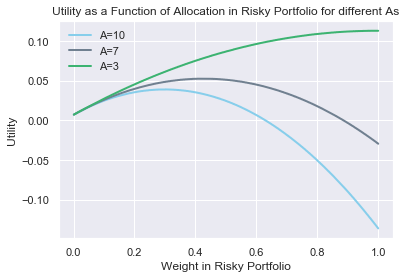

In [99]:
# Prepare data
df_3in=pd.DataFrame({'Weight_Risky': portfolio_10['Weight_Risky'], 
                     'U10': portfolio_10['Utility'],
                     'U7': portfolio_7['Utility'],
                     'U3': portfolio_3['Utility']})
 
# multiple line plot
plt.plot('Weight_Risky', 'U10', data=df_3in, color='skyblue', linewidth=2, label="A=10")
plt.plot('Weight_Risky', 'U7', data=df_3in, color='slategrey', linewidth=2, label="A=7")
plt.plot('Weight_Risky', 'U3', data=df_3in, color='mediumseagreen', linewidth=2, label="A=3")
plt.legend()
plt.xlabel('Weight in Risky Portfolio')
plt.ylabel('Utility')
plt.title('Utility as a Function of Allocation in Risky Portfolio for different As')
plt.show();